<a href="https://colab.research.google.com/github/okayhrm/globalterroirst/blob/main/globalterrorist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dogcat/globalterrorismdb_0718dist.csv', encoding = 'ISO-8859-1')
df

In [ ]:
df.columns

In [ ]:
df.describe()

In [6]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','provstate':'state',
                     'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target','nkill':'Killed',
                     'nwound': 'Wounded','summary':'Summary','gname':'Group','targtype1_txt':'Target_type',
                     'weaptype1_txt':'Weapon_type','motive':'Motive'
                    },inplace=True)

In [ ]:
df

In [7]:
df = df[['eventid','Year','Month','Day','Country','Region','state','city','latitude','longitude','AttackType','Killed','Wounded',
            'Target','Summary','Group','Target_type','Weapon_type','Motive','success']]
df

,eventid,Year,Month,Day,Country,Region,state,city,latitude,longitude,AttackType,Killed,Wounded,Target,Summary,Group,Target_type,Weapon_type,Motive,success
0,197000000001,1970,7,2,Dominican Republic,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,Assassination,1.0,0.0,Julio Guzman,NaN,MANO-D,Private Citizens & Property,Unknown,NaN,1
1,197000000002,1970,0,0,Mexico,North America,Federal,Mexico city,19.371887,-99.086624,Hostage Taking (Kidnapping),0.0,0.0,"Nadine Chaval, daughter",NaN,23rd of September Communist League,Government (Diplomatic),Unknown,NaN,1
2,197001000001,1970,1,0,Philippines,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,Assassination,1.0,0.0,Employee,NaN,Unknown,Journalists & Media,Unknown,NaN,1
3,197001000002,1970,1,0,Greece,Western Europe,Attica,Athens,37.997490,23.762728,Bombing/Explosion,NaN,NaN,U.S. Embassy,NaN,Unknown,Government (Diplomatic),Explosives,NaN,1
4,197001000003,1970,1,0,Japan,East Asia,Fukouka,Fukouka,33.580412,130.396361,Facility/Infrastructure Attack,NaN,NaN,U.S. Consulate,NaN,Unknown,Government (Diplomatic),Incendiary,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181686,201712310022,2017,12,31,Somalia,Sub-Saharan Africa,Middle Shebelle,Ceelka Geelow,2.359673,45.385034,Armed Assault,1.0,2.0,Checkpoint,12/31/2017: Assailants opened fire on a Somali...,Al-Shabaab,Military,Firearms,NaN,1
181687,201712310029,2017,12,31,Syria,Middle East & North Africa,Lattakia,Jableh,35.407278,35.942679,Bombing/Explosion,2.0,7.0,Hmeymim Air Base,12/31/2017: Assailants launched mortars at the...,Muslim extremists,Military,Explosives,NaN,1
181688,201712310030,2017,12,31,Philippines,Southeast Asia,Maguindanao,Kubentog,6.900742,124.437908,Facility/Infrastructure Attack,0.0,0.0,Houses,12/31/2017: Assailants set fire to houses in K...,Bangsamoro Islamic Freedom Movement (BIFM),Private Citizens & Property,Incendiary,NaN,1
181689,201712310031,2017,12,31,India,South Asia,Manipur,Imphal,24.798346,93.940430,Bombing/Explosion,0.0,0.0,Office,12/31/2017: Assailants threw a grenade at a Fo...,Unknown,Government (General),Explosives,NaN,0


**HEY SO WE ARE GONNA START EDA FROM HERE**

I have removed all the columns which didnt seem neccessary or are mostly empty.

The topics we are gonna cover in this seesions are

1. Top countries affected by terrorism
2. Top groups contributing to terrorism
3. Success rate of terrorist attacks
4. Terrroist attack trends(1970-2017)
5. Highest attack type
6. Terrorism activities in India


# 1) Top countries affected by terrorism

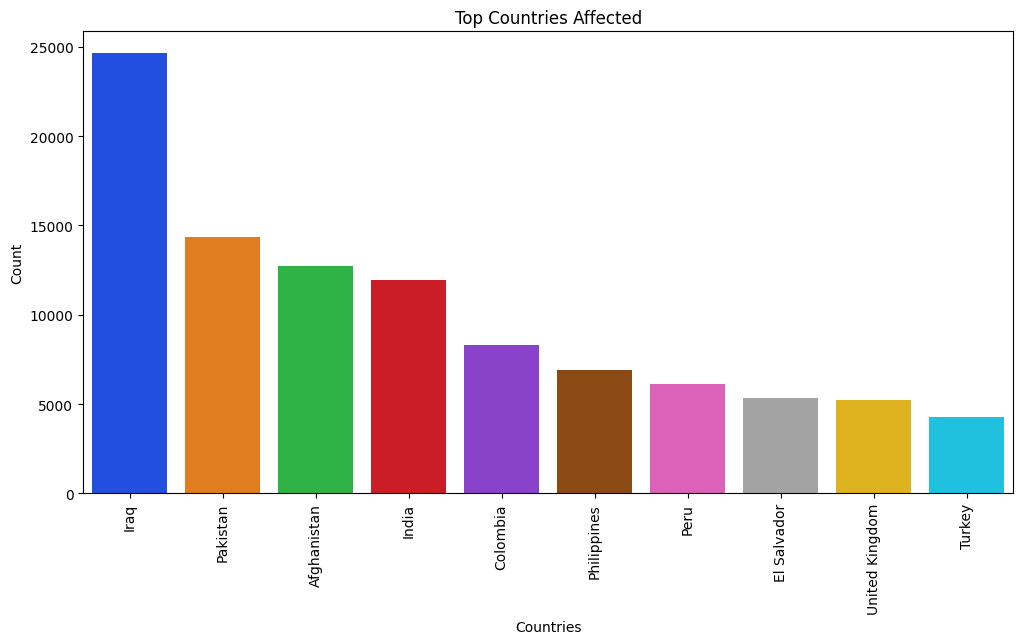

In [8]:
plt.subplots(figsize=(12,6))
one=df['Country'].value_counts()[:10].to_frame().reset_index()
one.columns= ['Country','Attacks_Counts']
sns.barplot(x='Country',y='Attacks_Counts', data= one, palette='bright')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

In [ ]:
print("Iraq is the country which the most affected by terrorism")

Iraq is the country which the most affected by terrorism


#2) Top groups contributing to terrorism

In [9]:
attack_groups = df[['AttackType','Group','Weapon_type','Target_type']]

In [10]:
group_counts = attack_groups['Group'].value_counts()
sort = group_counts.sort_values(ascending=False)
sort = sort.iloc[1:]
top_5 = sort.head(5)

In [11]:
sort

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
                                                    ... 
Thadou People's Liberation Army (TPLA)                 1
Quit Kashmir Movement (QKM)                            1
Cells of Direct Attack - Living Waste Group            1
Conspiracy of Vengeful Arsonists                       1
MANO-D                                                 1
Name: Group, Length: 3536, dtype: int64

In [12]:
top_5

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
Name: Group, dtype: int64

Taliban is the most active terrorist group.

Accordint to the dataset it is actually unknown type but we dont consider it as it is not a group.

#3) Success rate of terrorist attacks





In [13]:
attack_number = df.groupby('Year').size().reset_index(name='count')
attack_number

,Year,count
0,1970,651
1,1971,471
2,1972,568
3,1973,473
4,1974,581
5,1975,740
6,1976,923
7,1977,1319
8,1978,1526
9,1979,2662


In [12]:
total_attacks = attack_number['count'].sum()
print('Total number of attacks all over the world:', total_attacks)

Total number of attacks all over the world: 181691


In [14]:
success = df.groupby(['success']).size().reset_index(name='count')
success['percentage'] =  success['count']/total_attacks *100
success

,success,count,percentage
0,0,20059,11.040173
1,1,161632,88.959827


Text(0.5, 0, 'success')

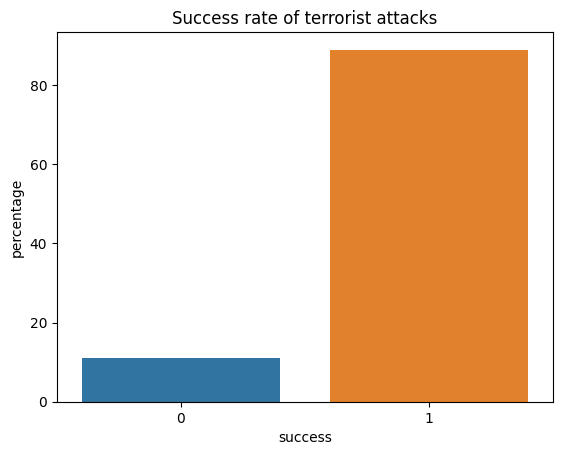

In [17]:
sns.barplot(x = 'success', y = 'percentage', data=success)
plt.title("Success rate of terrorist attacks")
plt.xlabel("success")

#4) Terrroist attack trends(1970-2017)

In [23]:
year_attacks = df.groupby('Year').size().reset_index(name='count')

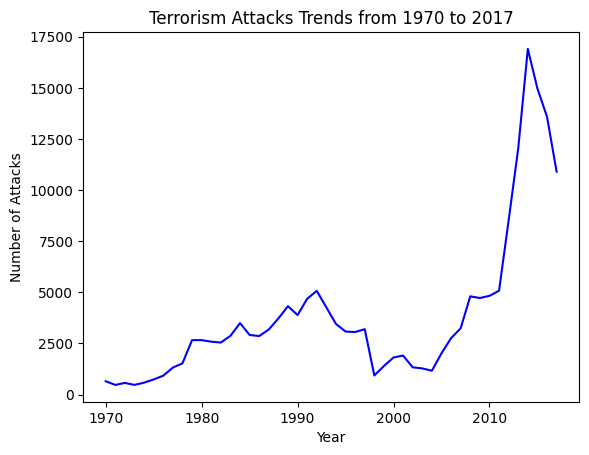

In [24]:
sns.lineplot(x='Year', y='count', data=year_attacks, color='blue')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.title("Terrorism Attacks Trends from 1970 to 2017")
plt.show()

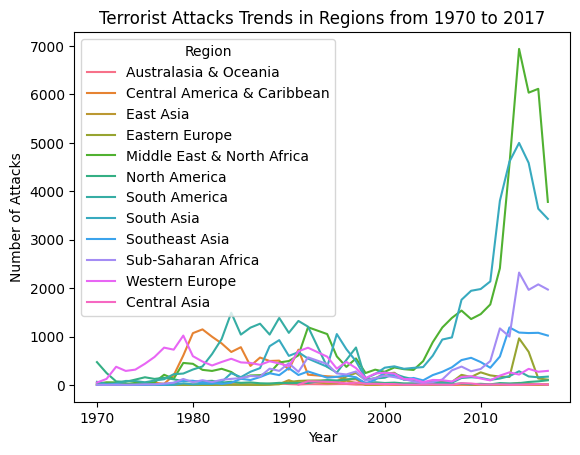

In [19]:
year_attacks_region = df.groupby(['Year','Region']).size().reset_index(name='count')
sns.lineplot(x='Year',y='count',hue='Region',data=year_attacks_region)
plt.title('Terrorist Attacks Trends in Regions from 1970 to 2017')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()

#5) Highest attack type

In [15]:
kill_count = df.groupby('AttackType').size().reset_index(name='count')

In [16]:
kill_count

,AttackType,count
0,Armed Assault,42669
1,Assassination,19312
2,Bombing/Explosion,88255
3,Facility/Infrastructure Attack,10356
4,Hijacking,659
5,Hostage Taking (Barricade Incident),991
6,Hostage Taking (Kidnapping),11158
7,Unarmed Assault,1015
8,Unknown,7276


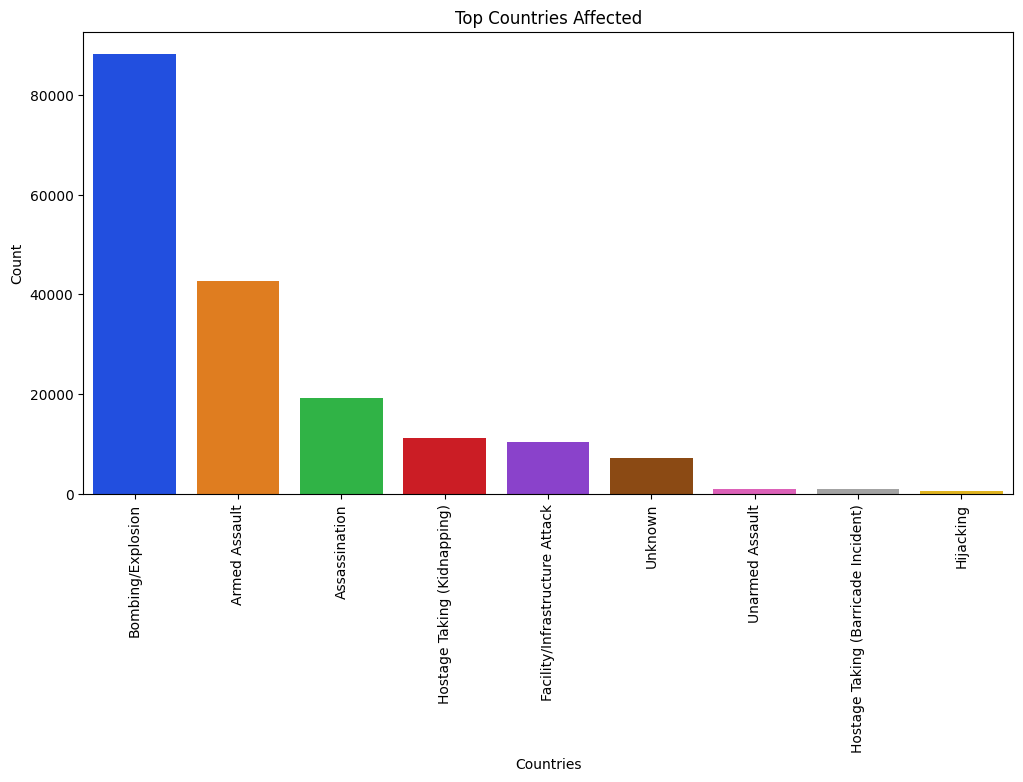

In [17]:
plt.subplots(figsize=(12,6))
one=df['AttackType'].value_counts()[:10].to_frame().reset_index()
one.columns= ['Country','Attacks_Counts']
sns.barplot(x='Country',y='Attacks_Counts', data= one, palette='bright')
plt.title('Top Countries Affected')
plt.xlabel('Countries')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#6)Terrorism activities in India

In [20]:
India = df[(df['Country'] == 'India')]

In [21]:
India_attacks = India['eventid'].count()
print('There were',India_attacks ,'attacks in India.')

There were 11960 attacks in India.


In [22]:
nkills_India = India.groupby('AttackType')[['Killed']].sum().reset_index()
nkills_India

,AttackType,Killed
0,Armed Assault,9378.0
1,Assassination,2001.0
2,Bombing/Explosion,5830.0
3,Facility/Infrastructure Attack,135.0
4,Hijacking,42.0
5,Hostage Taking (Barricade Incident),136.0
6,Hostage Taking (Kidnapping),819.0
7,Unarmed Assault,28.0
8,Unknown,972.0


<Axes: xlabel='AttackType', ylabel='Killed'>

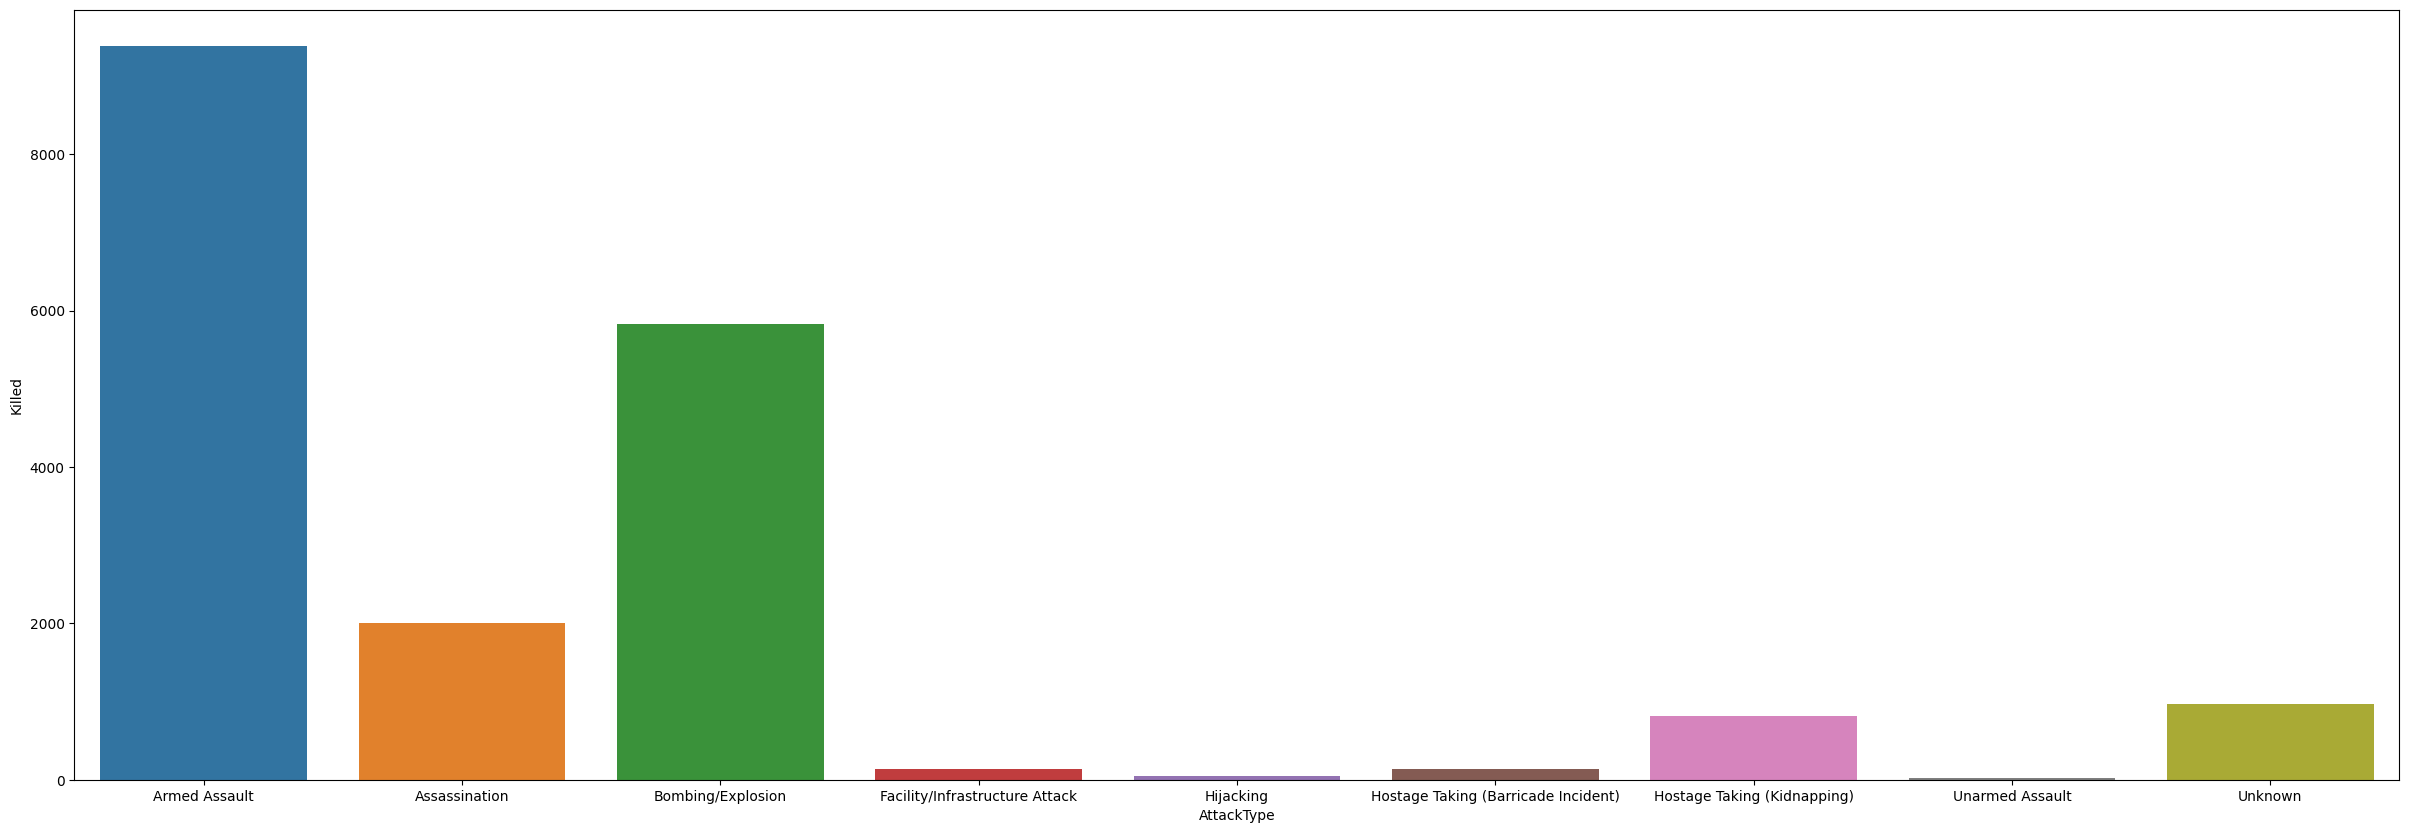

In [23]:
plt.figure(figsize=(30,10))
sns.barplot(x='AttackType', y='Killed', data=nkills_India)